# Default_Credit_Card_Clients

In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

import pandasql as psql

# pip install pandasql

In [2]:
# Load the Default Credit Card clients data

dccdata = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\42 seasion 15-jul-2021\Default_Credit_Card_Clients_SVM.csv", header=0)
dccdata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Display dataset information
dccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
dccdata.rename({'default payment next month' : 'CC_Default'},axis =1, inplace=True)
dccdata.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,CC_Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

dccdata_count = dccdata.CC_Default.value_counts()
print('Class 0:', dccdata_count[0])
print('Class 1:', dccdata_count[1])
print('Proportion:', round(dccdata_count[0] / dccdata_count[1], 2), ': 1')
print('Total CC Trans:', len(dccdata))

Class 0: 23364
Class 1: 6636
Proportion: 3.52 : 1
Total CC Trans: 30000


In [6]:
# Dealing with Duplicate values

dccdata_dup = dccdata[dccdata.duplicated(keep='last')]
dccdata_dup

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,CC_Default


# Dealing w/ Missing Data

In [7]:
# Missing value data size

dccdata_missing = (dccdata[(dccdata.EDUCATION == 0) | (dccdata.MARRIAGE == 0)])
dccdata_missing.shape

(68, 25)

In [8]:
# No Missing value data size

dccdata_no_missing = dccdata[(dccdata.EDUCATION != 0) & (dccdata.MARRIAGE != 0)]
dccdata_no_missing.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,CC_Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
# Downsampling the database - No Default

from sklearn.utils import resample

dccdata_no_default = dccdata_no_missing[dccdata_no_missing['CC_Default']==0]
dccdata_no_default_downsampled = resample(dccdata_no_default, replace=False, n_samples=1000, random_state=42)
len(dccdata_no_default_downsampled)

1000

In [10]:
dccdata_default = dccdata_no_missing[dccdata_no_missing['CC_Default']==1]
dccdata_default_downsampled = resample(dccdata_default, replace=False, n_samples=1000, random_state=42)
len(dccdata_default_downsampled)

1000

In [11]:
dccdata_downsample = pd.concat([dccdata_default_downsampled, dccdata_no_default_downsampled])
len(dccdata_downsample)

2000

In [12]:
# Converting variables into dummies

dccdata_downsample = pd.get_dummies(dccdata_downsample, columns=['SEX', 'EDUCATION', 'MARRIAGE',
                                                                 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
                                                                 'PAY_5', 'PAY_6'])
dccdata_downsample.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
19982,19983,300000,47,5000,5000,5000,5000,5000,5000,0,...,0,0,0,0,1,0,0,0,0,0
19350,19351,80000,36,19671,20650,0,0,0,0,1700,...,0,1,0,0,0,0,0,0,0,0
17057,17058,30000,22,29793,29008,29047,29507,11609,11711,0,...,0,0,0,1,0,0,0,0,0,0
26996,26997,80000,34,61231,62423,63827,64682,65614,67007,2800,...,0,0,0,0,1,0,0,0,0,0
23621,23622,210000,44,11771,13462,17706,0,5646,14793,13462,...,0,1,0,0,0,0,0,0,0,0


In [13]:
cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [14]:
# Identify independent and target variables

x = dccdata_downsample.drop(['CC_Default', 'ID'], axis=1)
y = dccdata_downsample['CC_Default']

In [15]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_test_F1 = x_test.copy()

In [16]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

# SVM - Gaussian Kernel

In [17]:
# Building a preliminary SVM (Fit the Model to the data:)

from sklearn.svm import SVC

dccdataSVM = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                 decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
                 max_iter=-1, probability=False, random_state=42, shrinking=True,
                 tol=0.001, verbose=False)
dccdataSVM.fit(x_train, y_train)

SVC(random_state=42)

In [18]:
# Predictions with test data

y_pred = dccdataSVM.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Confusion matrix : 
 [[194 108]
 [ 63 235]]
Outcome Values : 
 194 108 63 235
Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.64      0.69       302
           0       0.69      0.79      0.73       298

    accuracy                           0.71       600
   macro avg       0.72      0.72      0.71       600
weighted avg       0.72      0.71      0.71       600

Accuracy : 71.5 %
Precision : 75.5 %
Recall : 64.2 %
F1 Score : 0.694
Balanced Accuracy : 71.6 %
MCC 0.435
roc_auc_score: 0.715


# Hyperparameter tuning

In [19]:
# Cross-Validation & GridSearch — Optimization Techniques

# we including C=1 and gamma = 'scale' cause these are default values
# rbf = radial basis function, cause typically it gives us the best performance

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5,0.1,1,10,100,1000], 'gamma':['scale', 1,0.1,0.01,0.001,0.0001], 'kernel':['rbf']}

optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy', verbose=3)

In [20]:
# fit the SVM model

optimal_params.fit(x_train, y_train)
print(optimal_params.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .................C=0.5, gamma=scale, kernel=rbf; total time=   0.1s
[CV 2/5] END .................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=0.5, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END .....................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.5, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.5, gamma=0.

[CV 3/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 3/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............

In [21]:
# Building a preliminary SVM (Fit the Model to the data:)
# {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

from sklearn.svm import SVC

dccdataSVM = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                 decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
                 max_iter=-1, probability=False, random_state=42, shrinking=True,
                 tol=0.001, verbose=False)
dccdataSVM.fit(x_train, y_train)

# Predictions with test data

y1_pred = dccdataSVM.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y1_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

Confusion matrix : 
 [[186 116]
 [ 56 242]]
Outcome Values : 
 186 116 56 242
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.62      0.68       302
           0       0.68      0.81      0.74       298

    accuracy                           0.71       600
   macro avg       0.72      0.71      0.71       600
weighted avg       0.72      0.71      0.71       600

Accuracy : 71.3 %
Precision : 76.9 %
Recall : 61.6 %
F1 Score : 0.684
Balanced Accuracy : 71.4 %
MCC 0.436
roc_auc_score: 0.714


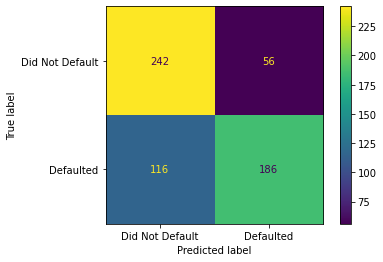

In [22]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dccdataSVM, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [23]:
# Cross-Validation & GridSearch — Optimization Techniques

# we including C=1 and gamma = 'scale' cause these are default values
# rbf = radial basis function, cause typically it gives us the best performance

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5,0.1,1,10,100,1000], 'gamma':['scale', 1,0.1, 0.01,0.001,0.0001], 'kernel':['linear']}

optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy', verbose=3)

In [24]:
# Fit the SVM model

optimal_params.fit(x_train, y_train)
print(optimal_params.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ..............C=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.5, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ..................C=0.5, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.5, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.5, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.5, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.5, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=0.5, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ................C=0.5, gamma=0.1, 

[CV 2/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.2s
[CV 3/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.1s
[CV 4/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.2s
[CV 5/5] END .................C=10, gamma=0.1, kernel=linear; total time=   0.1s
[CV 1/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.1s
[CV 2/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.1s
[CV 3/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.1s
[CV 4/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.1s
[CV 5/5] END ................C=10, gamma=0.01, kernel=linear; total time=   0.1s
[CV 1/5] END ...............C=10, gamma=0.001, kernel=linear; total time=   0.1s
[CV 2/5] END ...............C=10, gamma=0.001, kernel=linear; total time=   0.1s
[CV 3/5] END ...............C=10, gamma=0.001, kernel=linear; total time=   0.1s
[CV 4/5] END ...............

In [25]:
# Building a preliminary SVM (Fit the Model to the data:)
# {'C': 1000, 'gamma': 'scale', 'kernel': 'linear'}

from sklearn.svm import SVC

dccdataSVM = SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                 decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
                 max_iter=-1, probability=False, random_state=42, shrinking=True,
                 tol=0.001, verbose=False)
dccdataSVM.fit(x_train, y_train)

# Predictions with test data

y2_pred = dccdataSVM.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y2_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y2_pred), 3))

Confusion matrix : 
 [[172 130]
 [ 50 248]]
Outcome Values : 
 172 130 50 248
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.57      0.66       302
           0       0.66      0.83      0.73       298

    accuracy                           0.70       600
   macro avg       0.72      0.70      0.70       600
weighted avg       0.72      0.70      0.69       600

Accuracy : 70.0 %
Precision : 77.5 %
Recall : 57.0 %
F1 Score : 0.656
Balanced Accuracy : 70.1 %
MCC 0.416
roc_auc_score: 0.701


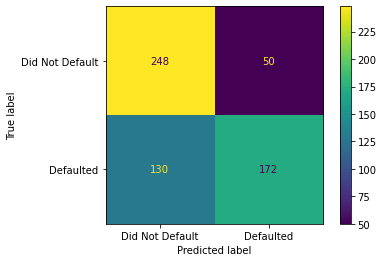

In [26]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dccdataSVM, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [27]:
# Building a preliminary SVM (Fit the Model to the data:) with default values


from sklearn.svm import SVC

dccdataSVM = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
                 decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
                 max_iter=-1, probability=False, random_state=42, shrinking=True,
                 tol=0.001, verbose=False)
dccdataSVM.fit(x_train, y_train)

# Predictions with test data

y3_pred = dccdataSVM.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y3_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

Confusion matrix : 
 [[173 129]
 [ 51 247]]
Outcome Values : 
 173 129 51 247
Classification report : 
               precision    recall  f1-score   support

           1       0.77      0.57      0.66       302
           0       0.66      0.83      0.73       298

    accuracy                           0.70       600
   macro avg       0.71      0.70      0.70       600
weighted avg       0.72      0.70      0.70       600

Accuracy : 70.0 %
Precision : 77.2 %
Recall : 57.3 %
F1 Score : 0.658
Balanced Accuracy : 70.1 %
MCC 0.415
roc_auc_score: 0.701


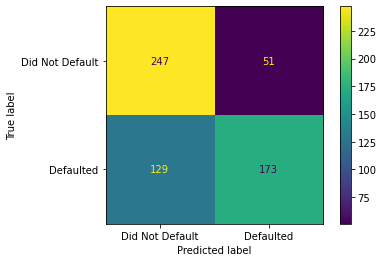

In [28]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dccdataSVM, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])